# Fashion MNIST with Convolutional Neural Networks (CNNs)
Homework 2

Adalat Khan Fahim

2021521460110

Welcome to my homework on deep learning with PyTorch using the Fashion MNIST dataset. In this project, we will build a Convolutional Neural Network (CNN) to classify various fashion items, including clothing, shoes, and accessories.

**Objectives:**

Understand the structure of the Fashion MNIST dataset.

Implement a CNN model using PyTorch.

Train the model on the Fashion MNIST dataset.

Evaluate the model's performance and accuracy.

# Install necessary libraries and dependencies

In [ ]:

%pip install numpy
%pip install torch torchvision
%pip install jupyter
%pip install scikit-learn
%pip install seaborn matplotlib
# !pip install numpy
# !pip install torch torchvision
# !pip install jupyter
# !pip install scikit-learn
# !pip install seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
 

## Setup and Installation

Let's start by importing the necessary libraries and modules required for our tutorial.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Setting up device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}.")

device


Running on cpu.


device(type='cpu')

## Understanding the Fashion MNIST Dataset

The Fashion MNIST dataset is a collection of grayscale images of 10 fashion categories, each of size 28x28 pixels. It's used as a drop-in replacement for the classic MNIST dataset. It serves as a more challenging classification problem than the regular MNIST digit dataset due to the similarities in clothing items.

![Fashion MNIST Sample](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Each image in the dataset corresponds to a label from 0-9, representing the ten categories:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Data Loading and Preprocessing

To process and use the Fashion MNIST dataset with PyTorch, we'll utilize the `torchvision` module, which provides a convenient API to load and transform datasets.






In [ ]:
# Import the necessary transformations module from torchvision
import torchvision.transforms as transforms

# Define a transformation pipeline.
# Here, we're only converting the images to PyTorch tensor format.
transform = transforms.Compose([transforms.ToTensor()])

# Using torchvision, load the Fashion MNIST training dataset.
# root specifies the directory where the dataset will be stored.
# train=True indicates that we want the training dataset.
# download=True will download the dataset if it's not present in the specified root directory.
# transform applies the defined transformations to the images.
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create a data loader for the training set.
# It will provide batches of data, in this case, batches of size 4.
# shuffle=True ensures that the data is shuffled at the start of each epoch.
# num_workers=2 indicates that two subprocesses will be used for data loading.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Similarly, load the Fashion MNIST test dataset.
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define the class labels for the Fashion MNIST dataset.
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

100%|██████████| 26421880/26421880 [00:04<00:00, 6276040.65it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306360.04it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5583992.92it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5004003.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**Now let's see a batch of image as example just to check the dataset is working fine**

Sandal Sneaker Coat Sneaker


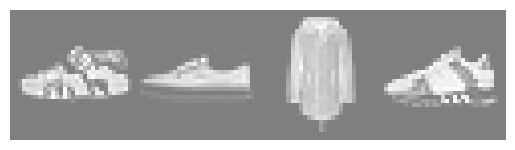

In [ ]:
# Function to show a batch of images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

The FashionDataset class is a custom implementation designed to facilitate loading the Fashion MNIST dataset. It initializes the dataset from structured data, prepares the images and labels, and defines methods to retrieve individual samples and the dataset's length. By integrating this class with a PyTorch DataLoader, we can easily iterate over the dataset for training or evaluation purposes.

In [ ]:
from torch.utils.data import Dataset
import numpy as np

class FashionDataset(Dataset):
    """User defined class to build a dataset using PyTorch class Dataset."""

    def __init__(self, dataset, transform=None):
        """Method to initialize variables."""
        self.data = dataset
        self.transform = transform

    def __getitem__(self, index):
        image, label = self.data[index]  # Get image and label from the dataset

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.data)


In [ ]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transformation pipeline to convert images to PyTorch tensor format
transform = transforms.Compose([transforms.ToTensor()])

# Load the Fashion MNIST training dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create a data loader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Load the Fashion MNIST test dataset
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create a data loader for the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define the class labels for the Fashion MNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Example: Iterating through the training data loader
for images, labels in trainloader:
    # Here, you can process the images and labels as needed
    print("Batch of images shape:", images.shape)  # Shape should be (batch_size, 1, 28, 28)
    print("Batch of labels:", labels)
    break  # Remove this to iterate through the entire dataset


Batch of images shape: torch.Size([4, 1, 28, 28])
Batch of labels: tensor([1, 8, 6, 3])


### We have 10 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 5, we return Sandal.



In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [ ]:
# Check the length of the training set
trainset_length = len(trainset)
print("Number of training samples:", trainset_length)


Number of training samples: 60000


***Trying to visualize a single image from the batch ***

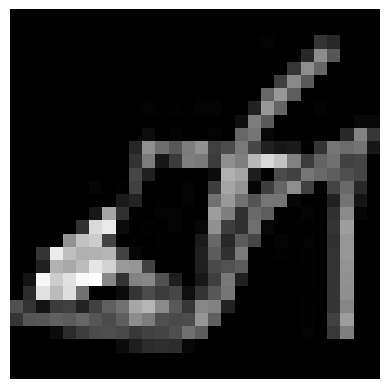

tensor(5)


In [ ]:
# Get the first batch of images and labels
images, labels = next(iter(trainloader))

# Select the first image in the batch
image = images[0]  # Shape will be (1, 28, 28)

# Display the image
plt.imshow(image.squeeze(), cmap="gray")  # Squeeze to remove the channel dimension
plt.axis('off')  # Optionally hide the axes
plt.show()  # Show the image

# Print the corresponding label
print(labels[0])  # Print the label for the first image


sets up a data loader for the training dataset, retrieves the first batch of images and labels, and then prints the types and shapes of those tensors. It helps to confirm that our data loading process is working correctly and that we're getting the expected dimensions for our batches.

In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Define transformations (including normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load the Fashion MNIST dataset
train_set = FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader with a batch size of your choice (e.g., 10)
demo_loader = DataLoader(train_set, batch_size=10, shuffle=True)

# Retrieve a batch of images and labels
batch = next(iter(demo_loader))
images, labels = batch

# Print the types and shapes of the images and labels
print(type(images), type(labels))
print(images.shape, labels.shape)


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


A visual representation of a batch of images in a grid format, making it easier to visualize what our model is working with. It also prints the corresponding labels for each image, helping us to confirm that the images are correctly labeled. This is particularly useful for debugging and understanding our dataset better.

labels:  Ankle Boot, T-shirt/Top, Ankle Boot, Ankle Boot, Shirt, Pullover, Shirt, T-shirt/Top, Sneaker, Ankle Boot, 

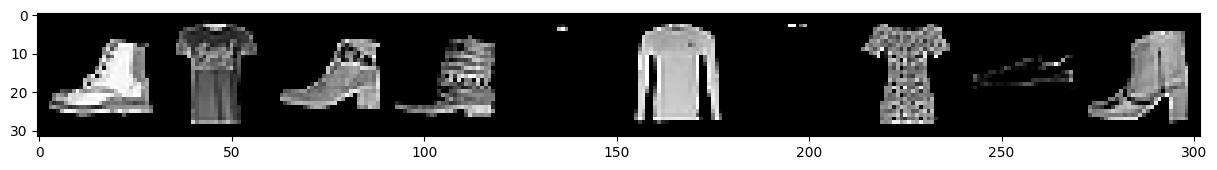

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Assuming you already have your 'images' and 'labels' from the DataLoader

# Create a grid of images
grid = vutils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))

# Print labels
print("labels: ", end=" ")
for label in labels:
    print(output_label(label), end=", ")


## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision. They are specifically designed to recognize visual patterns directly from pixel images with minimal preprocessing. CNNs are hierarchical models where neurons in one layer connect to neurons in the next layer in a limited fashion, somewhat like the receptive field in human vision.

![CNN Architecture](https://miro.medium.com/max/2824/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

A typical CNN architecture consists of:
1. **Convolutional Layers:** Apply convolution operation on the input layer to detect features.
2. **Activation Layers:** Introduce non-linearity to the model (typically ReLU).
3. **Pooling Layers:** Perform down-sampling operations to reduce dimensionality.
4. **Fully Connected Layers:** After several convolutional and pooling layers, the high-level reasoning in the neural network happens via fully connected layers.

Let's design a basic CNN for our dataset.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        # Input: [batch_size, 1, 28, 28]
        self.conv1 = nn.Conv2d(1, 32, 3)  # Output: [batch_size, 32, 26, 26]

        # Input: [batch_size, 32, 26, 26]
        self.conv2 = nn.Conv2d(32, 64, 3) # Output: [batch_size, 64, 11, 11]

        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Flattening: [batch_size, 64*5*5]
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Input: [batch_size, 1, 28, 28]
        x = F.relu(self.conv1(x))
        # Shape: [batch_size, 32, 26, 26]
        x = F.max_pool2d(x, 2)
        # Shape: [batch_size, 32, 13, 13]

        x = F.relu(self.conv2(x))
        # Shape: [batch_size, 64, 11, 11]
        x = F.max_pool2d(x, 2)
        # Shape: [batch_size, 64, 5, 5]

        x = x.view(-1, 64 * 5 * 5) # Flattening
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Training and Evaluation

### 1. Model Instantiation

We first create an instance of our model and transfer it to the appropriate device (either CPU or GPU).

In [ ]:
model = BasicCNN().to(device)


### 2. Optimizer and Loss Function

For training the neural network, we need an optimizer and a loss function. The optimizer updates the model parameters (weights and biases) to minimize the loss.

- **Optimizer**: The Adam optimizer is commonly used and adapts the learning rate during training.
- **Loss Function**: Since this is a classification task, we use the Cross Entropy Loss.


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


## Understanding Optimizers and Loss Functions

### Optimizers:

Optimizers are algorithms used to adjust the model's weights based on the gradient of the loss function. The goal is to minimize the loss. There are several optimizers available:

1. **SGD (Stochastic Gradient Descent)**: This is the basic form of the gradient descent algorithm. It updates the model's weights using the gradient of the loss function with respect to each weight.
    - Use: `torch.optim.SGD(model.parameters(), lr=learning_rate)`

2. **Momentum**: A variant of SGD that takes into account the previous steps, helping accelerate convergence and avoid local minima.
    - Use: `torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)`

3. **Adam**: Combines the advantages of two other extensions of SGD, namely AdaGrad and RMSProp. It adjusts the learning rate of each weight based on the historical gradient information.
    - Use: `torch.optim.Adam(model.parameters(), lr=learning_rate)`

4. **RMSProp**: Maintains a moving average of the squared gradient and divides the gradient by the root of this average.
    - Use: `torch.optim.RMSprop(model.parameters(), lr=learning_rate)`

### Loss Functions for Classification:

1. **Cross-Entropy Loss**: Used for multi-class classification. It quantifies the difference between the predicted probability distribution and the actual distribution.
    - Use: `nn.CrossEntropyLoss()`

2. **Binary Cross-Entropy Loss**: Specifically for binary classification tasks.
    - Use: `nn.BCELoss()`

3. **Hinge Loss (or Margin Loss)**: Used for "maximum-margin" classification, mostly for SVMs.
    - Use: `nn.HingeEmbeddingLoss()`

### Identifying the Task:

- **Classification**: In classification, the goal is to predict a class label for an input data point. If the dataset provides categorical labels (e.g., 'cat', 'dog', 'shirt', 'sandal'), it's a classification task.

- **Segmentation**: The goal in segmentation is to classify each pixel in an image. If the dataset provides images with colored regions indicating different objects or features, it's a segmentation task.

- **Regression**: Regression problems involve predicting a continuous value. If the dataset provides numerical values (e.g., house prices, stock prices) as labels, it's a regression task.

To discern between tasks, examine the dataset's labels and the problem's requirements. For example, if you're trying to predict an item's category from an image, it's classification. If predicting numerical values from features, it's regression.


## 3. Training Loop (Explained)

Training a neural network involves iteratively updating its weights to minimize the loss function. This process is typically achieved using gradient descent optimization algorithms. Here's an in-depth explanation of the training loop:

1. **Epochs**: An epoch represents one complete forward and backward pass of all the training examples. The number of epochs (`num_epochs`) is the number of times the learning algorithm will work through the entire training dataset. Usually a custom hyperparameter.

2. **Model Training Mode**: Neural networks can operate in different modes - training and evaluation. Some layers, like dropout, behave differently in these modes. Setting the model to training mode ensures that layers like dropout function correctly.

3. **Batch Processing**: Instead of updating weights after every training example (stochastic gradient descent) or after the entire dataset (batch gradient descent), we often update weights after a set of training examples known as a batch.

4. **Zeroing Gradients**: In PyTorch, gradients accumulate by default. Before calculating the new gradients in the current batch, we need to set the previous gradients to zero.

5. **Forward Pass**: The input data (images) are passed through the network, layer by layer, until we get the output. This process is called the forward pass.

6. **Calculate Loss**: Once we have the network's predictions (outputs), we compare them to the true labels using a loss function. This gives a measure of how well the network's predictions match the actual labels.

7. **Backward Pass**: To update the weights, we need to know the gradient of the loss function with respect to each weight. The backward pass computes these gradients.

8. **Update Weights**: The optimizer updates the weights based on the gradients computed in the backward pass.

This loop (forward pass, loss computation, backward pass, weight update) is repeated for every batch in the dataset, and the whole process is repeated for the specified number of epochs.



In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Number of complete passes through the dataset
num_epochs = 10  # Increased epochs for better training

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)  # Adjust the learning rate every epoch

# Lists for tracking loss and accuracy
train_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Start the training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct = 0
    total = 0

    # Iterate over each batch of the training data
    for images, labels in trainloader:
        # Move the images and labels to the computational device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Clear the gradients from the previous iteration
        optimizer.zero_grad()

        # Forward pass: Pass the images through the model to get the predicted outputs
        outputs = model(images)

        # Compute the loss between the predicted outputs and the true labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute the gradient of the loss w.r.t. model parameters
        loss.backward()

        # Update the model parameters
        optimizer.step()

        # Accumulate loss and accuracy
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Average loss and accuracy for the epoch
    average_loss = total_loss / len(trainloader)
    train_accuracy = (correct / total) * 100

    # Store the training loss and accuracy
    train_loss_list.append(average_loss)
    train_accuracy_list.append(train_accuracy)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = (val_correct / val_total) * 100
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, "
          f"Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

    # Step the scheduler
    scheduler.step()


Epoch [1/10], Loss: 0.1456, Training Accuracy: 94.56%, Validation Accuracy: 90.30%
Epoch [2/10], Loss: 0.1108, Training Accuracy: 95.76%, Validation Accuracy: 90.93%
Epoch [3/10], Loss: 0.0847, Training Accuracy: 96.85%, Validation Accuracy: 90.82%
Epoch [4/10], Loss: 0.0638, Training Accuracy: 97.62%, Validation Accuracy: 91.16%
Epoch [5/10], Loss: 0.0486, Training Accuracy: 98.22%, Validation Accuracy: 91.25%
Epoch [6/10], Loss: 0.0386, Training Accuracy: 98.67%, Validation Accuracy: 91.57%
Epoch [7/10], Loss: 0.0312, Training Accuracy: 98.93%, Validation Accuracy: 91.56%
Epoch [8/10], Loss: 0.0264, Training Accuracy: 99.13%, Validation Accuracy: 91.64%
Epoch [9/10], Loss: 0.0230, Training Accuracy: 99.28%, Validation Accuracy: 91.52%
Epoch [10/10], Loss: 0.0207, Training Accuracy: 99.33%, Validation Accuracy: 91.54%


## Evaluation

Once our model is trained, it's crucial to evaluate its performance on unseen data. We'll:

1. Generate predictions for the test set.
2. Compute the overall accuracy.
3. Examine the model's performance in detail using a confusion matrix and classification report.

These tools will provide insights into specific areas where the model excels or might need improvement.

**Note:** We don't want to compute gradients, so we use `torch.no_grad()`.

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.88      0.86      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.75      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



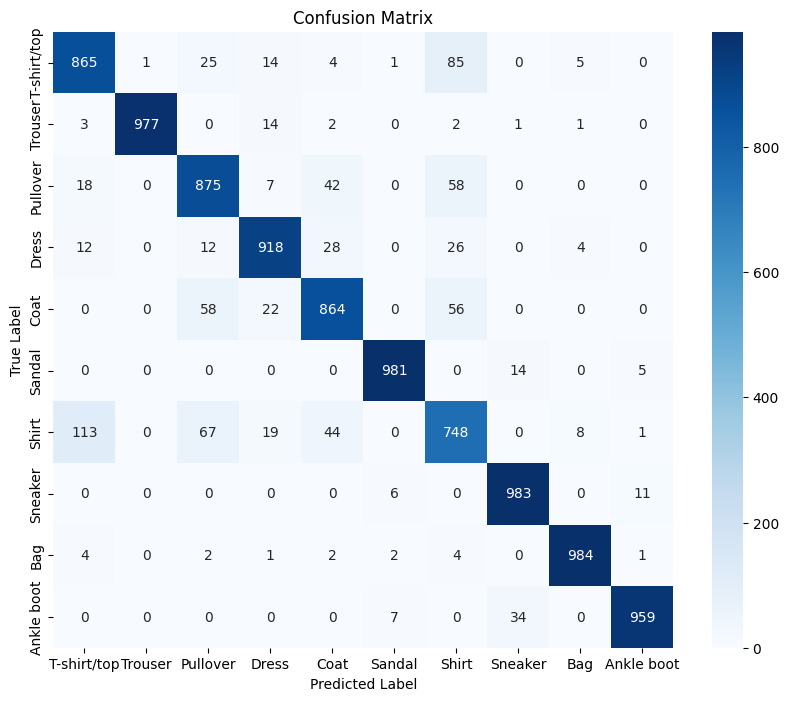

In [30]:
# Import necessary libraries:
# numpy for numerical operations
# sklearn.metrics for evaluation metrics like classification report and confusion matrix
# seaborn and matplotlib for data visualization
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode. This is important as certain layers like dropout behave differently during training and evaluation.
model.eval()

# Lists to store all predictions and true labels
all_preds = []
all_labels = []

# We don't want to compute gradients during evaluation, hence wrap the code inside torch.no_grad()
with torch.no_grad():
    # Iterate over all batches in the test loader
    for images, labels in testloader:
        # Transfer images and labels to the computational device (either CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Pass the images through the model to get predictions
        outputs = model(images)

        # Get the class with the maximum probability as the predicted class
        _, predicted = torch.max(outputs, 1)

        # Extend the all_preds list with predictions from this batch
        all_preds.extend(predicted.cpu().numpy())

        # Extend the all_labels list with true labels from this batch
        all_labels.extend(labels.cpu().numpy())

# Print a classification report which provides an overview of the model's performance for each class
print(classification_report(all_labels, all_preds, target_names=classes))

# Compute the confusion matrix using true labels and predictions
cm = confusion_matrix(all_labels, all_preds)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')  # x-axis label
plt.ylabel('True Label')       # y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()                     # Display the plot


## Advanced Topics: Regularization with Dropout

Dropout is a regularization technique for reducing overfitting in neural networks. During training, randomly selected neurons are ignored, which helps in preventing the model from becoming too reliant on any specific neuron. This dropout process introduces a form of noise into the training process, which can lead to better generalization.

![Dropout](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

Now, let's modify our CNN model to incorporate dropout and observe its impact.


In [31]:
import torch.nn as nn
import torch.nn.functional as F

class NetDropout(nn.Module):
    def __init__(self):
        super(NetDropout, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # Output shape: [batch_size, 32, 28, 28]
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) # Output shape: [batch_size, 64, 14, 14]

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # Reduces spatial dimensions by half

        # Dropout layer
        self.dropout = nn.Dropout(0.25)  # Helps prevent overfitting

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 512)  # Flattened input to 512 output features
        self.fc2 = nn.Linear(512, 10)          # 512 input features to 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # Shape: [batch_size, 32, 14, 14]
        x = self.pool(F.relu(self.conv2(x))) # Shape: [batch_size, 64, 7, 7]

        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.dropout(x)         # Apply dropout

        x = F.relu(self.fc1(x))     # First fully connected layer with ReLU activation
        x = self.fc2(x)             # Second fully connected layer

        # Here, we're not applying log_softmax. If you use nn.CrossEntropyLoss as the loss function later,
        # it will implicitly apply softmax for you.
        # If you plan on using nn.NLLLoss, uncomment the line below:
        # x = F.log_softmax(x, dim=1)

        return x

# Instantiate the model with dropout
model_dropout = NetDropout().to(device)
model_dropout


NetDropout(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

## Understanding the Role of `F.log_softmax`

The application of `F.log_softmax` at the end of the model's forward function is pivotal in certain contexts, and it's crucial to comprehend why and when we use it:

### Softmax
The **softmax** function is frequently employed in the terminal layer of a classification network. Its primary role is to convert the raw scores, also known as logits, that the network outputs into a probability distribution across the various classes. The results of this conversion are values that fall within the (0,1) range, and importantly, their sum amounts to 1.

### Log Softmax
On the other hand, **Log Softmax** is essentially the application of a logarithm post the softmax conversion. This transformation yields the log probabilities. A common pairing in PyTorch is between `F.log_softmax` and the `nn.NLLLoss` (Negative Log Likelihood Loss), as the latter anticipates log probabilities as its inputs.

### Why opt for `F.log_softmax` over a two-step `F.softmax` then logarithm?
A principal reason is numerical stability. When combined into the singular function `log_softmax`, the operations are more stable than when applied sequentially.

### What if we omit `F.log_softmax`?
If the model doesn't incorporate `log_softmax` (or even `softmax`), the outputs it produces are simply raw scores or logits. When the loss function in use is `nn.CrossEntropyLoss`, the explicit application of either `softmax` or `log_softmax` becomes unnecessary, as this loss function inherently handles that. Conversely, if `nn.NLLLoss` is the chosen loss function, the application of `log_softmax` becomes essential. Bypassing any form of softmax means the predictions the model renders won't be interpretable as valid probabilities.


In [32]:
optimizer = torch.optim.Adam(model_dropout.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


## Training

## Logging and Observing the Loss During Training

During the training of neural networks, it is crucial to monitor various metrics to understand how well the model is learning. One of the most fundamental metrics to track is the **training loss**. The loss provides insights into the discrepancies between the model's predictions and the actual labels. A lower loss typically indicates that the model's predictions are closer to the true values.

### Importance of Logging the Loss:

1. **Convergence Monitoring**: The loss should generally decrease as training progresses. If the loss stops decreasing (or increases), it could be an indication that the model has started to overfit, or that there might be other issues like a too high learning rate causing divergence.

2. **Hyperparameter Tuning**: Observing the loss can guide adjustments to hyperparameters. For instance, if the loss decreases very slowly, increasing the learning rate or changing the optimizer might help. On the other hand, if the loss shows high volatility, reducing the learning rate might be beneficial.

3. **Model Comparison**: When experimenting with various architectures or strategies, the loss provides a means to compare the effectiveness of different models.

4. **Early Stopping**: By tracking the loss on a validation dataset, we can stop training when the validation loss starts to increase, preventing overfitting.

### Best Practices:

- **Visualization**: While printing the loss values is helpful, visualizing them using graphs can be even more insightful. Tools like TensorBoard or libraries like Matplotlib can be used to plot the loss over epochs, providing a clearer picture of the training dynamics.

- **Frequency**: Depending on the length of training, you might want to log the loss every epoch, every N batches, or even after every batch. Choose a frequency that provides a good balance between insight and information overload.

- **Additional Metrics**: Besides the loss, it's often beneficial to track other metrics like accuracy, precision, recall, etc., especially on a validation dataset. These metrics provide a more comprehensive view of model performance.

In conclusion, consistently monitoring and logging the training loss is a foundational practice in deep learning. It serves as a first line of diagnostics for the training process, enabling timely interventions and guiding improvements.


In [34]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Number of complete passes through the dataset
num_epochs = 5

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)  # Adjust the learning rate every epoch

# Lists for tracking loss and accuracy
train_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

# Start the training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct = 0
    total = 0

    # Iterate over each batch of the training data
    for images, labels in trainloader:
        # Move the images and labels to the computational device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Clear the gradients from the previous iteration
        optimizer.zero_grad()

        # Forward pass: Pass the images through the model to get the predicted outputs
        outputs = model(images)

        # Compute the loss between the predicted outputs and the true labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute the gradient of the loss w.r.t. model parameters
        loss.backward()

        # Update the model parameters
        optimizer.step()

        # Accumulate loss and accuracy
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Average loss and accuracy for the epoch
    average_loss = total_loss / len(trainloader)
    train_accuracy = (correct / total) * 100

    # Store the training loss and accuracy
    train_loss_list.append(average_loss)
    train_accuracy_list.append(train_accuracy)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = (val_correct / val_total) * 100
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, "
          f"Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

    # Step the scheduler
    scheduler.step()


Epoch [1/5], Loss: 0.0195, Training Accuracy: 99.41%, Validation Accuracy: 91.54%
Epoch [2/5], Loss: 0.0195, Training Accuracy: 99.41%, Validation Accuracy: 91.54%
Epoch [3/5], Loss: 0.0195, Training Accuracy: 99.41%, Validation Accuracy: 91.54%
Epoch [4/5], Loss: 0.0195, Training Accuracy: 99.41%, Validation Accuracy: 91.54%
Epoch [5/5], Loss: 0.0195, Training Accuracy: 99.41%, Validation Accuracy: 91.54%


**Let's see epochs ve accuracy and Loss**

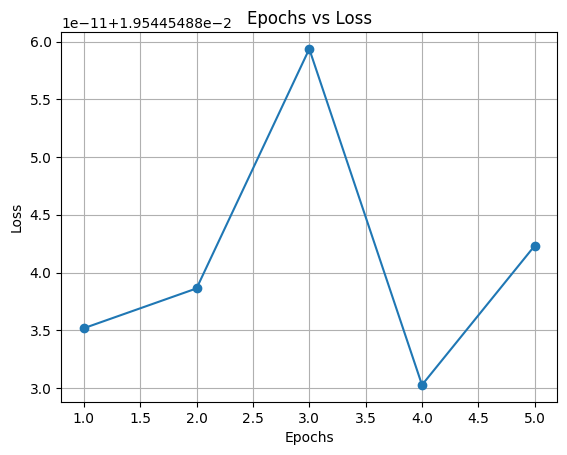

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already defined train_loss_list during training
plt.plot(range(1, num_epochs + 1), train_loss_list, marker='o')  # Plotting epoch numbers
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.grid(True)
plt.show()


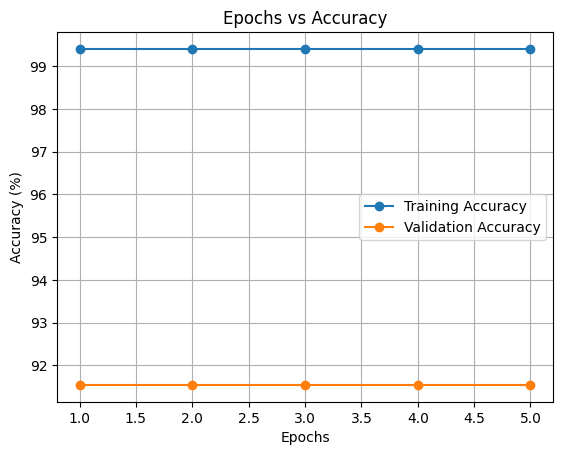

In [37]:
import matplotlib.pyplot as plt

# Plotting training accuracy
plt.plot(range(1, num_epochs + 1), train_accuracy_list, marker='o', label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy_list, marker='o', label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Epochs vs Accuracy")
plt.legend()  # Add legend to differentiate between training and validation accuracy
plt.grid(True)  # Optional: add grid for better readability
plt.show()


## Evaluation

## Reusing the Evaluation Code and The Importance of Testing on a Validation Set

In the subsequent steps, I'll be reusing the same evaluation code we discussed earlier. You might wonder, "Why not change it?" or "Why is this step even necessary?". Let's delve into the reasoning behind this.

### The Essence of Evaluation:

1. **Generalization**: While our model might perform exceptionally well on the training data, it's crucial to understand how it behaves on unseen data. Evaluation on a test or validation set offers insights into the model's ability to generalize to new, unseen examples, which is, after all, the primary goal of building machine learning models.

2. **Overfitting Detection**: If a model performs exceptionally well on training data but poorly on the validation set, it might be overfitting. Overfitting occurs when a model learns the training data too closely, even its noise and outliers, making it less effective on new data.

3. **Model Comparison**: Evaluation metrics on the validation set provide an objective way to compare different models or strategies, helping in selecting the best one for the problem at hand.

4. **Hyperparameter Tuning**: The performance on the validation set can guide adjustments to model hyperparameters. It provides feedback on the effectiveness of any changes, ensuring they lead to genuine improvements rather than merely fitting the training data better.

### Why Reuse?

- **Consistency**: Using the same evaluation code ensures consistency in results, making comparisons valid and meaningful.

- **Efficiency**: There's no need to "reinvent the wheel" if the current evaluation code already effectively assesses the model's performance on the validation set.

- **Accuracy**: A tried-and-tested evaluation code that's known to work correctly reduces the chance of introducing bugs or errors in the evaluation process.

In conclusion, regularly evaluating on a validation or test set is an indispensable practice in machine learning. It keeps us grounded by showing how the model is likely to perform in real-world scenarios, beyond the confines of the training data.

**Note:** We are evaluating the dropout model so we use `model_dropout`.

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.79      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.77      0.82      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.77      0.88      0.82      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.69      0.72      0.70      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



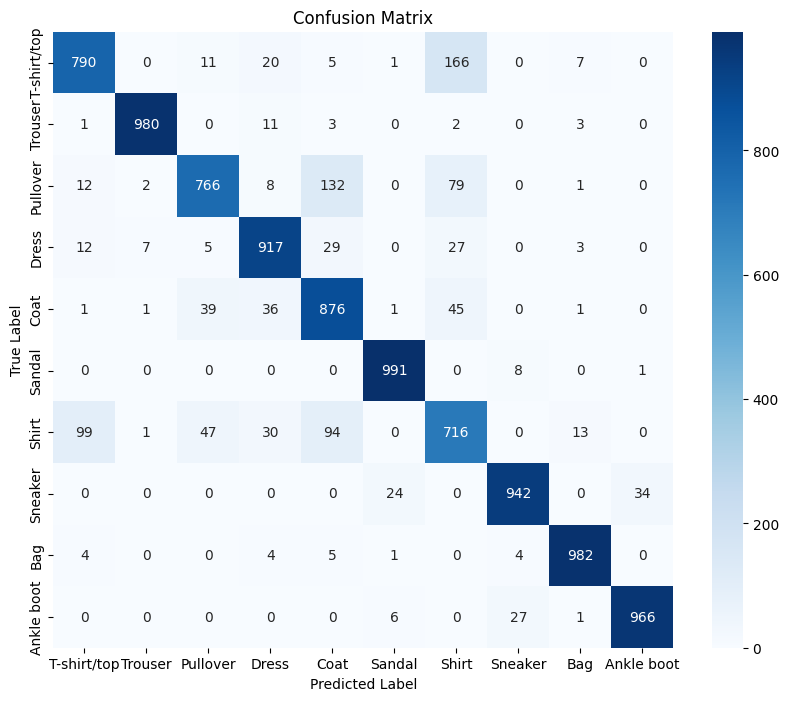

In [38]:
# Import necessary libraries:
# numpy for numerical operations
# sklearn.metrics for evaluation metrics like classification report and confusion matrix
# seaborn and matplotlib for data visualization
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode. This is important as certain layers like dropout behave differently during training and evaluation.
model_dropout.eval()

# Lists to store all predictions and true labels
all_preds = []
all_labels = []

# We don't want to compute gradients during evaluation, hence wrap the code inside torch.no_grad()
with torch.no_grad():
    # Iterate over all batches in the test loader
    for images, labels in testloader:
        # Transfer images and labels to the computational device (either CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Pass the images through the model to get predictions
        outputs = model_dropout(images)

        # Get the class with the maximum probability as the predicted class
        _, predicted = torch.max(outputs, 1)

        # Extend the all_preds list with predictions from this batch
        all_preds.extend(predicted.cpu().numpy())

        # Extend the all_labels list with true labels from this batch
        all_labels.extend(labels.cpu().numpy())

# Print a classification report which provides an overview of the model's performance for each class
print(classification_report(all_labels, all_preds, target_names=classes))

# Compute the confusion matrix using true labels and predictions
cm = confusion_matrix(all_labels, all_preds)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')  # x-axis label
plt.ylabel('True Label')       # y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()                     # Display the plot


In [39]:
# Initialize variables for overall loss and accuracy
total_val_loss = 0
val_correct = 0
val_total = 0

model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)
        total_val_loss += loss.item()  # Accumulate loss

        # Calculate predictions
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

# Compute average validation loss and accuracy
average_val_loss = total_val_loss / len(testloader)
overall_accuracy = (val_correct / val_total) * 100

print(f"Overall Validation Loss: {average_val_loss:.4f}")
print(f"Overall Validation Accuracy: {overall_accuracy:.2f}%")


Overall Validation Loss: 0.5887
Overall Validation Accuracy: 91.54%
